In [1016]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests
import time
from bs4 import BeautifulSoup
import re

In [1017]:
#genre_dict line is to map the document with genre ID numbers but not numbers.
genre_dict = {"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}
df_ratings=pd.read_csv('imdb.title.ratings.csv.gz')
df_basics=pd.read_csv('imdb.title.basics.csv.gz')
df_gross=pd.read_csv('bom.movie_gross.csv.gz')
df_name_basics=pd.read_csv('imdb.name.basics.csv.gz')
df_title_akas=pd.read_csv('imdb.title.akas.csv.gz')
#df_budget=pd.read_csv('tn.movie_budgets.csv.gz')
df_TMDB=pd.read_csv('TMDB_cleaned.csv')
df_writers=pd.read_csv('Writersb.csv')

In [ ]:
#Questions to address:
#Documentaries, sports movies? (And which ones would be considered sports movies?)
#Critic, customer reviews (Assuming Microsoft is more interested in critic reviews b/c more potentialpositive publicity there)
#Top writers, studios (recruiting)
#Most popular (stars), highest grossing ($)
#Diversity/inclusion (next steps)

In [1018]:
df_ratings.head()
df_ratings.sort_values(by='numvotes',ascending=False)
#Would like to get movie titles, genres, and studios in this table to make more useful conclusions.
#Filter out ones with low amounts of numvotes

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655
...,...,...,...
39180,tt8050582,8.0,5
33886,tt6449270,4.0,5
22243,tt3819584,7.6,5
49605,tt2136926,5.8,5


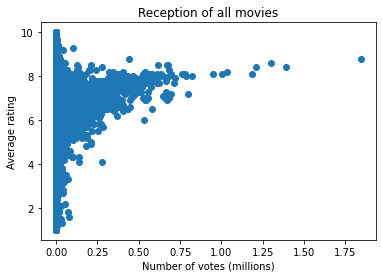

Correlation between ratings and other variables: 


numvotes         0.044478
averagerating    1.000000
Name: averagerating, dtype: float64

In [1019]:
fig, ax=plt.subplots()
popularity_subplot=ax.scatter(df_ratings['numvotes']/1e6,df_ratings['averagerating'])
ax.set_xlabel('Number of votes (millions)')
ax.set_ylabel('Average rating')
ax.set_title('Reception of all movies')
plt.show()

df_ratings.describe()

#Show correlations (nothing very useful from this table, but this is often helpful)
print('Correlation between ratings and other variables: ')
df_ratings.corr()['averagerating'].sort_values()

In [1020]:
df_ratings.isna().any()

tconst           False
averagerating    False
numvotes         False
dtype: bool

In [1021]:
#Great, no issues with that dataset we just viewed.

In [1022]:
df_ratings_basics.sort_values(by='numvotes',ascending=False)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
63498,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
8738,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
24920,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
38058,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
48221,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
39180,tt8050582,8.0,5,Jackal Stories,Cuentos de chacales,2017,70.0,Documentary
33886,tt6449270,4.0,5,Chu lian wei man,Chu lian wei man,2013,105.0,"Drama,Romance"
22243,tt3819584,7.6,5,De onderkoning: strijd om de grondwet,De onderkoning: strijd om de grondwet,2014,51.0,Drama
49605,tt2136926,5.8,5,Fools,Fools,2011,77.0,"Action,Comedy,Horror"


In [1023]:
#df_ratings_basics[df_ratings_basics['numvotes'] > 1000]
#Filter out movies without much publicity. These are irrelevant.

In [1024]:
#df_ratings_basics.head()

In [1025]:
#genres=[]
#for f in df_ratings_basics:
#    for g in f.strip('[]').split(','):
#        if not g in genres:
#            genres.append(g)

In [1026]:
#genres=set(list(map(lambda x: x.strip(' '),genres)))

In [1027]:
#for g in genres:
#    df_ratings_basics[g]=df_ratings_basics.apply(lambda x: g in x)

In [1028]:
#Merge the ratings and basics tables.
#df_ratings_basics=df_ratings.merge(df_basics, left_on='tconst',right_on='tconst')
#df_ratings_basics.head()

In [1029]:
#Generating a list of all genres
#genres = set()
#for genre_string in df_ratings_basics['genres']:
#   genre_list = genre_string.split(',')
#   for genre in genre_list:
#       genres.add(genre)
#genres = list(genres)

In [1030]:
#print(genres)

In [1031]:
#for g in genres:
#    df_ratings_basics_new[g]=df_ratings_basics_new['genres'].apply(lambda x: g in x)

In [1032]:
df_topdf_ratings_basics_new[['Animation', 'Sport', 'Mystery', 'Action', 'Comedy', 'Documentary', 'Romance', 'News', 'War', 'Horror', 'Fantasy', 'Family', 'Music', 'Musical', 'Sci-Fi', 'History', 'Biography', 'Thriller', 'Crime', 'Adventure', 'Drama']]*=1

In [1035]:
df_ratings_basics_new=df_ratings_basics.dropna(subset=['genres'])

In [1296]:
#We do not want null values. This will help us address them (decided null runtime values were acceptable
#since those are unrelated to our analysis and recommendations).
df_ratings_basics_new.isna().sum()

tconst                0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7332
genres                0
Animation             0
Sport                 0
Mystery               0
Action                0
Comedy                0
Documentary           0
Romance               0
News                  0
War                   0
Horror                0
Fantasy               0
Family                0
Music                 0
Musical               0
Sci-Fi                0
History               0
Biography             0
Thriller              0
Crime                 0
Adventure             0
Drama                 0
dtype: int64

In [1038]:
df_basics.head(100).sort_values('genres',ascending=False)
#How to deal with comma-separated genres and break those apart. Use different columns?
#Create 3 columns? Analysis on top genres/studios/writers would be helpful.

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
32,tt0293069,Dark Blood,Dark Blood,2012,86.0,Thriller
29,tt0283440,Short Time Heroes,Kurzzeithelden,2015,45.0,Sci-Fi
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
97,tt0431021,The Possession,The Possession,2012,92.0,"Horror,Mystery,Thriller"
51,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror
...,...,...,...,...,...,...
22,tt0253093,Gangavataran,Gangavataran,2018,134.0,NaN
35,tt0306058,Second Coming,Second Coming,2012,95.0,NaN
40,tt0326592,The Overnight,The Overnight,2010,88.0,NaN
44,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,NaN


In [1039]:
df_gross_basics=df_basics.merge(df_gross, left_on='primary_title',right_on='title')
df_gross_basics.sort_values(['domestic_gross'], ascending=False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
1528,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.0,646900000,2018
2876,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
9,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015
2283,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
2703,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",Incredibles 2,BV,608600000.0,634200000,2018
...,...,...,...,...,...,...,...,...,...,...,...
2083,tt2300975,Jessabelle,Jessabelle,2014,90.0,"Horror,Thriller",Jessabelle,LGF,NaN,7000000,2014
2322,tt2594078,Viral,Viral,2013,95.0,"Comedy,Horror,Thriller",Viral,W/Dim.,NaN,552000,2016
2323,tt2597892,Viral,Viral,2016,85.0,"Drama,Horror,Sci-Fi",Viral,W/Dim.,NaN,552000,2016
2324,tt3892200,Viral,Viral,2015,NaN,Horror,Viral,W/Dim.,NaN,552000,2016


In [1168]:
#Convert domestic gross into a number format so that we can do arithmetic with it.
df_budget['domestic_gross'] = df_budget['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [1167]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,"$2,776,345,279",335507625.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875",-169536125.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,"$149,762,350",-307237650.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963",128405868.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,"$1,316,721,747",303181382.0


In [1044]:
df_budget['production_budget'] = df_budget['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [1045]:
df_budget['profit'] = df_budget['domestic_gross'] - df_budget['production_budget']

In [1046]:
df_budget.sort_values('profit',ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,"$2,053,311,220",630662225.0
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,"$1,348,258,224",500059566.0
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,"$2,208,208,395",459363944.0
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000.0,460998007.0,"$786,598,007",449998007.0
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,"$1,648,854,864",437270625.0
...,...,...,...,...,...,...,...
31,32,"May 18, 2012",Battleship,220000000.0,65233400.0,"$313,477,717",-154766600.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875",-169536125.0
12,13,"Jul 2, 2013",The Lone Ranger,275000000.0,89302115.0,"$260,002,115",-185697885.0
13,14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,"$282,778,100",-201941321.0


In [1048]:
#df_budget_TMDB=df_budget.merge(df_TMDB, left_on='movie',right_on='title')
#Merging the budget and TMDB tables on the movie titles to get the information we need in one dataframe.
df_budget_TMDB.sort_values(['vote_count'], ascending=False)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,id_y,release_date_y,title,vote_average,vote_count,Year
117,38,"Jul 16, 2010",Inception,160000000.0,292576195.0,"$835,524,642",132576195.0,27205,2010-07-16,Inception,8.3,22186,2010
484,56,"Feb 12, 2016",Deadpool,58000000.0,363070709.0,"$801,025,593",305070709.0,293660,2016-02-12,Deadpool,7.6,20175,2016
20,35,"Aug 14, 1998",The Avengers,60000000.0,23385416.0,"$48,585,416",-36614584.0,24428,2012-05-04,The Avengers,7.6,19673,2012
19,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,"$1,517,935,897",398279547.0,24428,2012-05-04,The Avengers,7.6,19673,2012
110,32,"Nov 5, 2014",Interstellar,165000000.0,188017894.0,"$666,379,375",23017894.0,157336,2014-11-05,Interstellar,8.2,18597,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,43,"Apr 7, 2006",Simon,1300000.0,4055.0,"$1,738,663",-1295945.0,259712,2017-02-01,Simon,0.0,1,2017
1966,35,"May 22, 2009",The Girlfriend Experience,1300000.0,695840.0,"$1,005,840",-604160.0,496053,2014-10-05,The Girlfriend Experience,5.0,1,2014
1965,28,"Dec 31, 2014",House at the End of the Drive,1400000.0,0.0,$0,-1400000.0,280381,2014-01-11,House at the End of the Drive,8.0,1,2014
1067,43,"Jul 27, 2016",Nerve,20000000.0,38583626.0,"$70,652,284",18583626.0,455240,2011-12-07,Nerve,10.0,1,2011


In [1049]:
#df_budget_TMDB.to_csv (r'/Users/jresis/Desktop/df_budget_TMDB.csv', index = False, header=True)
#Save as a csv to the desktop

In [1050]:
#df_gross_basics.head()

In [1051]:
#df_budget_TMDB.head()

In [1052]:
#df_ratings_basics.head()

In [1053]:
#df_gross_basics.to_csv (r'/Users/jresis/Desktop/df_budget_TMDB.csv', index = False, header=True)

In [1054]:
#Another table merge.
#df_main_table=df_budget_TMDB.merge(df_ratings_basics,left_on='movie',right_on='primary_title')

In [1055]:
#df_main_table.head()

In [1056]:
#df_gross_basics.to_csv (r'/Users/jresis/Desktop/df_main_table.csv', index = False, header=True)
#Making a main table with all the fields we need, converting to a csv file.

In [1057]:
#df_main_table.head()

In [1058]:
#df_main_table.to_csv (r'/Users/jresis/Desktop/df_budget_TMDB.csv', index = False, header=True)

In [1060]:
#df_2=df_main_table.merge(df_writers,left_on='tconst',right_on='tconst')

In [1061]:
#df_2.info()

In [1062]:
#df_2.to_csv (r'/Users/jresis/Desktop/df_2.csv', index = False, header=True)

In [1297]:
#df_gross_basics_3=df_basics.merge(df_gross, left_on='primary_title',right_on='title')
#df_gross_basics_3.info()

In [1065]:
df_3=df_ratings_basics_3.merge(df_writers,left_on='tconst',right_on='tconst')

In [1068]:
df_TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23050 entries, 0 to 23049
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            23050 non-null  int64  
 1   release_date  23050 non-null  object 
 2   title         23050 non-null  object 
 3   vote_average  23050 non-null  float64
 4   vote_count    23050 non-null  int64  
 5   Year          23050 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB


In [1076]:
df_writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74357 entries, 0 to 74356
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tconst        74357 non-null  object 
 1   category      74357 non-null  object 
 2   primary_name  74357 non-null  object 
 3   birth_year    13341 non-null  float64
 4   death_year    2447 non-null   float64
dtypes: float64(2), object(3)
memory usage: 2.8+ MB


In [ ]:
df_4=df_writers.merge(df_writers,left_on='tconst',right_on='tconst')

In [1082]:
#df_6=df_ratings_basics_new.merge(df_TMDB,left_on='primary_title',right_on='title')

In [1084]:
#df_6.to_csv (r'/Users/jresis/Desktop/df_6.csv', index = False, header=True)

In [1085]:
#df_7=df_6.merge(df_writers,left_on='tconst',right_on='tconst')

In [1086]:
#df_7.to_csv (r'/Users/jresis/Desktop/df_7.csv', index = False, header=True)

In [1089]:
#df_7.isna().sum()

In [1090]:
df_7.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Animation,Sport,...,id,release_date,title,vote_average,vote_count,Year,category,primary_name,birth_year,death_year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,...,188207,2014-01-10,The Legend of Hercules,4.5,805,2014,writer,Sean Hood,1966.0,NaN
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,...,188207,2014-01-10,The Legend of Hercules,4.5,805,2014,writer,Daniel Giat,1955.0,NaN
2,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,...,188207,2014-01-10,The Legend of Hercules,4.5,805,2014,writer,Giulio Steve,NaN,NaN
3,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",0,1,...,74447,2010-10-26,The Hammer,6.5,16,2010,writer,Eben Kostbar,NaN,NaN
4,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",0,1,...,74447,2010-10-26,The Hammer,6.5,16,2010,writer,Joseph McKelheer,NaN,NaN


In [1094]:
df_budget_TMDB.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,id_y,release_date_y,title,vote_average,vote_count,Year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875",-169536125.0,1865,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963",128405868.0,99861,2015-05-01,Avengers: Age of Ultron,7.3,13457,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,"$2,048,134,200",378815482.0,299536,2018-04-27,Avengers: Infinity War,8.3,13948,2018
3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,"$655,945,209",-70975705.0,141052,2017-11-17,Justice League,6.2,7510,2017
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,"$655,945,209",-70975705.0,141052,2017-11-17,Justice League,6.2,7510,2017


In [1096]:
df_profit_genre=df_budget_TMDB.merge(df_ratings_basics_new,left_on='movie',right_on='primary_title')

In [1295]:
df_profit_genre_ranked=df_profit_genre.sort_values('profit',ascending=False)
df_profit_genre_ranked.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,id_y,release_date_y,title,...,Family,Music,Musical,Sci-Fi,History,Biography,Thriller,Crime,Adventure,Drama
47,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,"$1,348,258,224",500059566.0,284054,2018-02-16,Black Panther,...,0,0,0,1,0,0,0,0,1,0
46,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,"$1,348,258,224",500059566.0,86841,2011-01-18,Black Panther,...,0,0,0,1,0,0,0,0,1,0
25,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,"$1,648,854,864",437270625.0,135397,2015-06-12,Jurassic World,...,0,0,0,1,0,0,0,0,1,0
48,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,"$1,242,520,711",408581744.0,260513,2018-06-15,Incredibles 2,...,0,0,0,0,0,0,0,0,1,0
19,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,"$1,517,935,897",398279547.0,24428,2012-05-04,The Avengers,...,0,0,0,1,0,0,0,0,1,0


In [1116]:
#df_8=df_7.merge(df_profit_genre_ranked,left_on='tconst',right_on='tconst')

In [ ]:
#df_8.to_csv (r'/Users/jresis/Desktop/df_8.csv', index = False, header=True)

In [1123]:
#df_9=df_budget.merge(df_7,left_on='movie',right_on='title')

In [1124]:
#df_9.to_csv (r'/Users/jresis/Desktop/df_9.csv', index = False, header=True)

In [1161]:
#Trying to make a master table with all columns we need. We would also like to ensure the lack of
#duplicate records.
df_9.tconst.duplicated().sum()

2721

In [1162]:
df_9b = df_9.drop_duplicates(keep='first', subset='tconst')

In [1169]:
#Looking for correlations between average rating and various variables such as genre and domestic gross.
#As we expect, one of the strongest positive correlations is between average rating and domestic gross.
df_9b.corr()['averagerating'].sort_values(ascending=False)

averagerating        1.000000
vote_average         0.616414
numvotes             0.433461
vote_count           0.377074
runtime_minutes      0.344690
domestic_gross       0.274010
profit               0.208912
Biography            0.207274
Drama                0.204670
production_budget    0.199099
Documentary          0.142840
History              0.082756
Adventure            0.080547
Animation            0.056610
Sport                0.054934
War                  0.043528
Music                0.033800
start_year           0.025263
Musical              0.023061
Romance              0.017673
Crime                0.013528
Year                 0.009077
Sci-Fi              -0.001316
id_x                -0.006031
Family              -0.010380
Comedy              -0.022414
Action              -0.026585
id_y                -0.033022
Fantasy             -0.038621
Mystery             -0.050163
birth_year          -0.105815
death_year          -0.135976
Thriller            -0.165115
Horror    

In [1170]:
#Looking a bit further into correlations.
#This time, we are viewing correlations between profit and other variables.
df_9.corr()['profit'].sort_values(ascending=False)

profit               1.000000
domestic_gross       0.782641
vote_count           0.489578
numvotes             0.418296
averagerating        0.249161
Musical              0.248342
vote_average         0.218251
Music                0.145782
runtime_minutes      0.126507
Sci-Fi               0.122826
production_budget    0.108136
start_year           0.100909
Family               0.083973
Comedy               0.062647
Fantasy              0.051476
Animation            0.050970
Year                 0.042423
Adventure            0.042141
id_x                 0.026972
Romance              0.009497
Biography            0.006798
id_y                 0.002074
Horror              -0.006960
Action              -0.008871
Sport               -0.019509
Mystery             -0.019915
Documentary         -0.021651
War                 -0.024233
History             -0.032693
Crime               -0.055952
Thriller            -0.056340
Drama               -0.119151
birth_year          -0.134299
death_year

In [1175]:
df_ratings_basics_new.sum(axis = 0, skipna = True) 

tconst             tt10356526tt10384606tt1042974tt1043726tt106024...
averagerating                                                 462487
numvotes                                                   260223835
primary_title      Laiye Je YaarianBorderlessJust InèsThe Legend ...
original_title     Laiye Je YaarianBorderlessJust InèsThe Legend ...
start_year                                                 147147287
runtime_minutes                                          6.22580e+06
genres             RomanceDocumentaryDramaAction,Adventure,Fantas...
Animation                                                       1743
Sport                                                           1179
Mystery                                                         3039
Action                                                          6988
Comedy                                                         17290
Documentary                                                    17753
Romance                           

In [1176]:
#Our work is not done, as we do not want to leave duplicate records in. More cleaning is required.
df_ratings_basics_nodups = df_ratings_basics_new.drop_duplicates(keep='first', subset='tconst')

In [1178]:
df_profit_analysis=df_budget_TMDB.merge(df_ratings_basics_nodups,left_on='movie',right_on='primary_title')

In [1211]:
#Looking for the top 20 grossing films since 2013.
df_top20=df_profit_analysis.sort_values('domestic_gross',ascending=False)

In [1286]:
df_top20.head(3)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,id_y,release_date_y,title,...,Family,Music,Musical,Sci-Fi,History,Biography,Thriller,Crime,Adventure,Drama
46,42,2018-02-16,Black Panther,200000000.0,700059566.0,"$1,348,258,224",500059566.0,86841,2011-01-18,Black Panther,...,0,0,0,1,0,0,0,0,1,0
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,"$2,048,134,200",378815482.0,299536,2018-04-27,Avengers: Infinity War,...,0,0,0,1,0,0,0,0,1,0
25,34,2015-06-12,Jurassic World,215000000.0,652270625.0,"$1,648,854,864",437270625.0,135397,2015-06-12,Jurassic World,...,0,0,0,1,0,0,0,0,1,0


In [1221]:
#Getting rid of duplicates
df_top20.drop_duplicates(keep='first', subset='id_x', inplace=True)

In [1287]:
#Converted all release dates into a date format (originally were text format.)
#This format conversion allows us to filtering out dates from before 2013.
df_top20['release_date_x']=pd.to_datetime(df_top20.release_date_x)
df_top20.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,id_y,release_date_y,title,...,Family,Music,Musical,Sci-Fi,History,Biography,Thriller,Crime,Adventure,Drama
46,42,2018-02-16,Black Panther,200000000.0,700059566.0,"$1,348,258,224",500059566.0,86841,2011-01-18,Black Panther,...,0,0,0,1,0,0,0,0,1,0
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,"$2,048,134,200",378815482.0,299536,2018-04-27,Avengers: Infinity War,...,0,0,0,1,0,0,0,0,1,0
25,34,2015-06-12,Jurassic World,215000000.0,652270625.0,"$1,648,854,864",437270625.0,135397,2015-06-12,Jurassic World,...,0,0,0,1,0,0,0,0,1,0
19,27,2012-05-04,The Avengers,225000000.0,623279547.0,"$1,517,935,897",398279547.0,24428,2012-05-04,The Avengers,...,0,0,0,1,0,0,0,0,1,0
48,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,"$1,242,520,711",408581744.0,260513,2018-06-15,Incredibles 2,...,0,0,0,0,0,0,0,0,1,0


In [1298]:
#Finalizing our list of the top 20 grossing films.
df_top20b = df_top20.loc[df_top20.Year >= 2013]

In [1291]:
df_top20c=df_top20b.head(20)

In [1292]:
#As we want, here are the top 20 grossing films.
#Please note that to test that only the top 20 were kept, we inserted a number
#greater than 20 in .head().
df_top20c.head(25)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,id_y,release_date_y,title,...,Family,Music,Musical,Sci-Fi,History,Biography,Thriller,Crime,Adventure,Drama
46,42,2018-02-16,Black Panther,200000000.0,700059566.0,"$1,348,258,224",500059566.0,86841,2011-01-18,Black Panther,...,0,0,0,1,0,0,0,0,1,0
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,"$2,048,134,200",378815482.0,299536,2018-04-27,Avengers: Infinity War,...,0,0,0,1,0,0,0,0,1,0
25,34,2015-06-12,Jurassic World,215000000.0,652270625.0,"$1,648,854,864",437270625.0,135397,2015-06-12,Jurassic World,...,0,0,0,1,0,0,0,0,1,0
48,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,"$1,242,520,711",408581744.0,260513,2018-06-15,Incredibles 2,...,0,0,0,0,0,0,0,0,1,0
50,45,2016-12-16,Rogue One: A Star Wars Story,200000000.0,532177324.0,"$1,049,102,856",332177324.0,330459,2016-12-16,Rogue One: A Star Wars Story,...,0,0,0,1,0,0,0,0,1,0
139,35,2017-03-17,Beauty and the Beast,160000000.0,504014165.0,"$1,259,199,706",344014165.0,10020,2012-01-13,Beauty and the Beast,...,1,1,1,0,0,0,0,0,0,0
51,46,2016-06-17,Finding Dory,200000000.0,486295561.0,"$1,021,215,193",286295561.0,127380,2016-06-17,Finding Dory,...,0,0,0,0,0,0,0,0,1,0
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963",128405868.0,99861,2015-05-01,Avengers: Age of Ultron,...,0,0,0,1,0,0,0,0,1,0
217,38,2013-11-22,The Hunger Games: Catching Fire,130000000.0,424668047.0,"$864,868,047",294668047.0,101299,2013-11-22,The Hunger Games: Catching Fire,...,0,0,0,1,0,0,0,0,1,0
121,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,"$1,305,772,799",247719760.0,351286,2018-06-22,Jurassic World: Fallen Kingdom,...,0,0,0,1,0,0,0,0,1,0


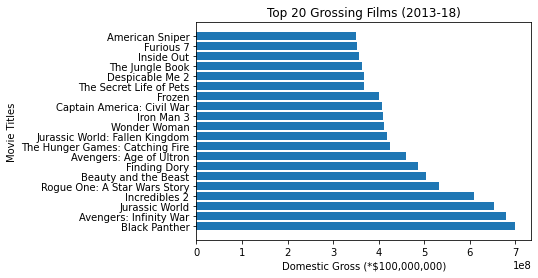

In [1301]:
#And now, putting the top 20 grossing films in bar graph form.
fig, ax=plt.subplots()
ax.barh(df_top20c['movie'],df_top20c['domestic_gross'])
ax.set_title('Top 20 Grossing Films (2013-18)')
ax.set_xlabel('Domestic Gross (*$100,000,000)')
ax.set_ylabel('Movie Titles')
plt.show()

In [1253]:
#Next, we are finding the movie genres that are created most often.
df_profit_analysis.sum(axis = 0, skipna = True) 

id_x                                                            158641
release_date_x       May 20, 2011May 1, 2015Apr 27, 2018Nov 17, 201...
movie                Pirates of the Caribbean: On Stranger TidesAve...
production_budget                                          1.11464e+11
domestic_gross                                             1.43871e+11
worldwide_gross      $1,045,663,875$1,403,013,963$2,048,134,200$655...
profit                                                     3.24074e+10
id_y                                                         737709424
release_date_y       2011-05-202015-05-012018-04-272017-11-172017-1...
title                Pirates of the Caribbean: On Stranger TidesAve...
vote_average                                                   18950.4
vote_count                                                     4561888
Year                                                           6209176
tconst               tt1298650tt2395427tt4154756tt0974015tt0974015t...
averag

In [1264]:
df_profit_analysis_filter = df_profit_analysis.filter(['Animation', 'Sport', 'Mystery', 'Action', 'Comedy', 'Documentary', 'Romance', 'News', 'War', 'Horror', 'Fantasy', 'Family', 'Music', 'Musical', 'Sci-Fi', 'History', 'Biography', 'Thriller', 'Crime', 'Adventure', 'Drama'])

In [1267]:
df_profit_analysis_sum=df_profit_analysis_filter.sum()

In [1277]:
df_profit_analysis_sum.head(21)

Animation       153
Sport            76
Mystery         231
Action          662
Comedy          767
Documentary     185
Romance         349
News              3
War              38
Horror          404
Fantasy         190
Family          138
Music            89
Musical          22
Sci-Fi          214
History          81
Biography       223
Thriller        609
Crime           391
Adventure       481
Drama          1686
dtype: int64

In [1279]:
genredata = [['Animation', 153], ['Sport', 76], ['Mystery', 231],['Action',662],['Comedy',767],['Documentary',185],['Romance',185],['News',3],['War',38],['Horror',404],['Fantasy',190],['Family',138],['Music',89],['Musical',22],['Sci-Fi',214],['History',81],['Biography',223],['Thriller',609],['Crime',391],['Adventure',481],['Drama',1686]] 

In [1282]:
df_genredata = pd.DataFrame(genredata, columns = ['Genre', 'Quantity'])

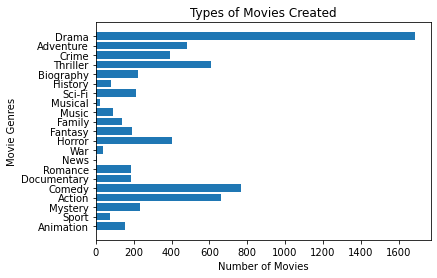

In [1284]:
#Putting the most frequently created movie genres in bar graph form.
fig, ax=plt.subplots()
ax.barh(df_genredata['Genre'],df_genredata['Quantity'])
ax.set_title('Types of Movies Created')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Movie Genres')
plt.show()

In [ ]:
#Dramas are the most frequent type of movie created by a wide margin. As a result, it will
#be more difficult to stand out against other companies. While it is acceptable to produce these,
#we recommend diversifying and not relying on dramas as the main source of revenue.

In [1210]:
genre_means=[df_profit_analysis.groupby(genre).mean() for genre in genres]
means_df=pd.DataFrame
genres = list(genres)
means_df['average profit']=genre_means

TypeError: 'type' object does not support item assignment

In [1255]:
#We need to filter out movies from before 2013.
df_profit_analysis2=df_profit_analysis.loc[df_profit_analysis.Year >= 2013]

In [1256]:
df_profit_analysis2.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,id_y,release_date_y,title,...,Family,Music,Musical,Sci-Fi,History,Biography,Thriller,Crime,Adventure,Drama
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963",128405868.0,99861,2015-05-01,Avengers: Age of Ultron,...,0,0,0,1,0,0,0,0,1,0
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,"$2,048,134,200",378815482.0,299536,2018-04-27,Avengers: Infinity War,...,0,0,0,1,0,0,0,0,1,0
3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,"$655,945,209",-70975705.0,141052,2017-11-17,Justice League,...,0,0,0,0,0,0,0,0,1,0
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,"$655,945,209",-70975705.0,141052,2017-11-17,Justice League,...,0,0,0,0,0,0,0,0,1,0
5,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,"$879,620,923",-99925825.0,206647,2015-11-06,Spectre,...,0,0,0,0,0,0,1,0,1,0


In [1257]:
#Dropping duplicates.
df_profit_analysis2.drop_duplicates(keep='first',subset='id_y',inplace=True)

<ipython-input-1257-891536fc50b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profit_analysis2.drop_duplicates(keep='first',subset='id_y',inplace=True)


In [1294]:
#Making sure that our updated table no longer has duplicates and releases from before 2013.
df_profit_analysis2.head(10)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,id_y,release_date_y,title,...,Family,Music,Musical,Sci-Fi,History,Biography,Thriller,Crime,Adventure,Drama
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963",128405868.0,99861,2015-05-01,Avengers: Age of Ultron,...,0,0,0,1,0,0,0,0,1,0
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,"$2,048,134,200",378815482.0,299536,2018-04-27,Avengers: Infinity War,...,0,0,0,1,0,0,0,0,1,0
3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,"$655,945,209",-70975705.0,141052,2017-11-17,Justice League,...,0,0,0,0,0,0,0,0,1,0
5,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,"$879,620,923",-99925825.0,206647,2015-11-06,Spectre,...,0,0,0,0,0,0,1,0,1,0
8,12,"May 25, 2018",Solo: A Star Wars Story,275000000.0,213767512.0,"$393,151,347",-61232488.0,348350,2018-05-25,Solo: A Star Wars Story,...,0,0,0,0,0,0,0,0,1,0
9,13,"Jul 2, 2013",The Lone Ranger,275000000.0,89302115.0,"$260,002,115",-185697885.0,57201,2013-07-03,The Lone Ranger,...,0,0,0,0,0,0,0,0,1,0
12,17,"May 6, 2016",Captain America: Civil War,250000000.0,408084349.0,"$1,140,069,413",158084349.0,271110,2016-05-06,Captain America: Civil War,...,0,0,0,1,0,0,0,0,1,0
13,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000.0,330360194.0,"$867,500,281",80360194.0,209112,2016-03-25,Batman v Superman: Dawn of Justice,...,0,0,0,0,0,0,0,0,1,0
15,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000.0,258366855.0,"$960,366,855",8366855.0,57158,2013-12-13,The Hobbit: The Desolation of Smaug,...,0,0,0,0,0,0,0,0,1,0
16,22,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,250000000.0,255119788.0,"$945,577,621",5119788.0,122917,2014-12-17,The Hobbit: The Battle of the Five Armies,...,0,0,0,0,0,0,0,0,1,0
